In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import haversine as hs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("./uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df=df.drop(['Unnamed: 0','key'],axis=1)


In [6]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.shape

(200000, 7)

In [9]:
df=df.dropna()

In [10]:
df.shape


(199999, 7)

In [11]:
df.pickup_datetime= pd.to_datetime(df.pickup_datetime,errors='coerce')

/tmp/ipykernel_29423/4201331719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pickup_datetime= pd.to_datetime(df.pickup_datetime,errors='coerce')


In [12]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [13]:
df =df.assign(
    hour= df.pickup_datetime.dt.hour,
    day =df.pickup_datetime.dt.day,
    month= df.pickup_datetime.dt.month,
     year= df.pickup_datetime.dt.year,
     dayofweek= df.pickup_datetime.dt.dayofweek
)

In [14]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [15]:
df=df.drop('pickup_datetime',axis=1)

In [16]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


fare_amount              Axes(0.125,0.77;0.227941x0.11)
pickup_longitude      Axes(0.398529,0.77;0.227941x0.11)
pickup_latitude       Axes(0.672059,0.77;0.227941x0.11)
dropoff_longitude       Axes(0.125,0.638;0.227941x0.11)
dropoff_latitude     Axes(0.398529,0.638;0.227941x0.11)
passenger_count      Axes(0.672059,0.638;0.227941x0.11)
hour                    Axes(0.125,0.506;0.227941x0.11)
day                  Axes(0.398529,0.506;0.227941x0.11)
month                Axes(0.672059,0.506;0.227941x0.11)
year                    Axes(0.125,0.374;0.227941x0.11)
dayofweek            Axes(0.398529,0.374;0.227941x0.11)
dtype: object

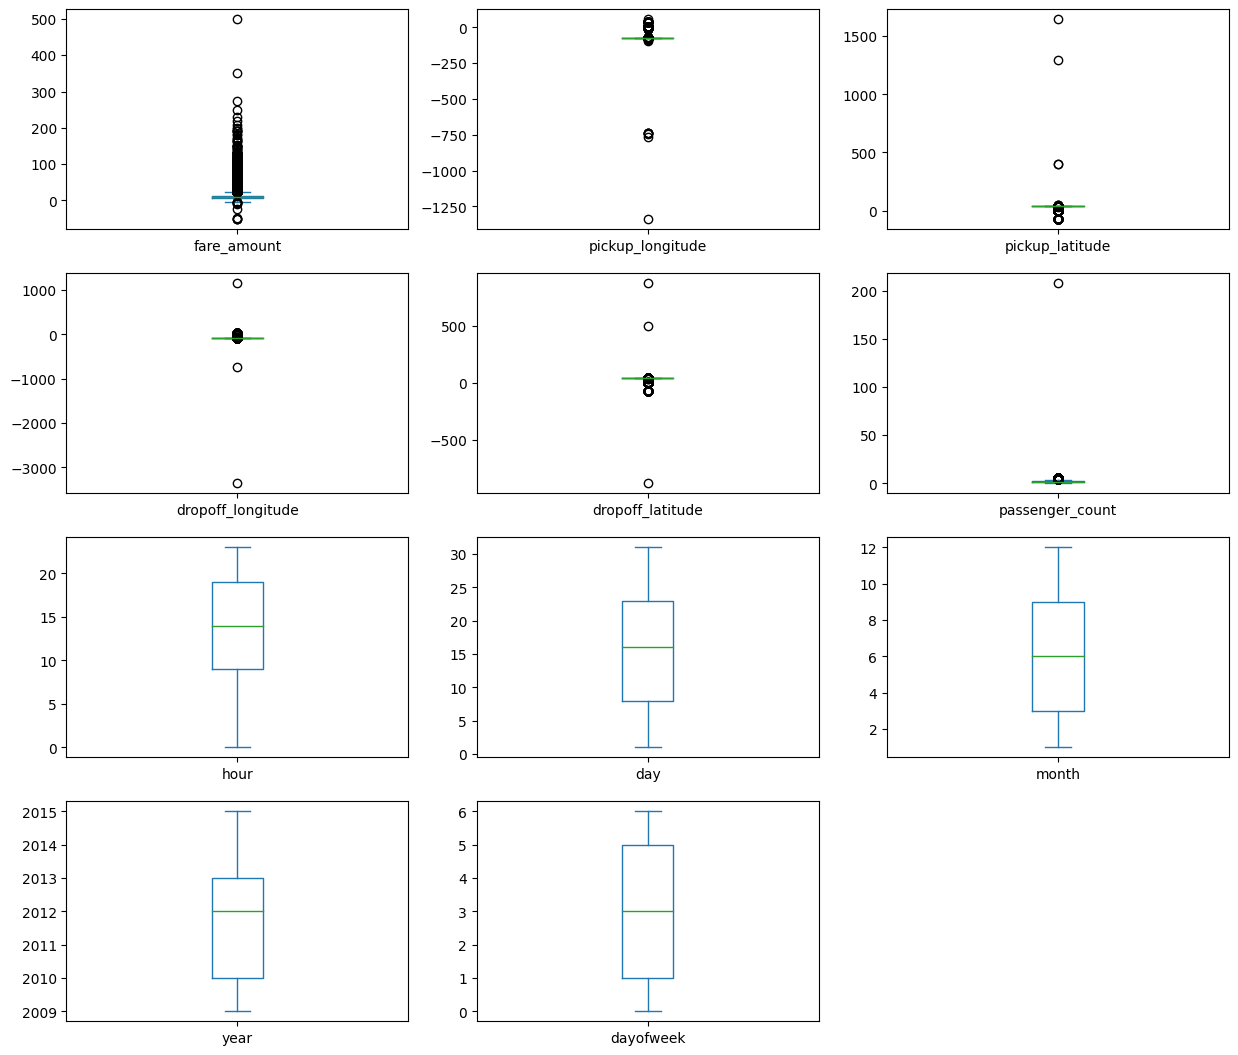

In [17]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

In [18]:
def treat_outliers(df1, columns):
    for col in columns:
        # Compute Q1 and Q3
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Set lower and upper limits
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Clip values outside the limits
        df[col] = df[col].clip(lower, upper)
    return df

# Apply to all columns
df = treat_outliers(df, df.columns)

In [19]:
df.head

<bound method NDFrame.head of         fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              7.50        -73.999817        40.738354         -73.999512   
1              7.70        -73.994355        40.728225         -73.994710   
2             12.90        -74.005043        40.740770         -73.962565   
3              5.30        -73.976124        40.790844         -73.965316   
4             16.00        -73.929788        40.744085         -73.973082   
...             ...               ...              ...                ...   
199995         3.00        -73.987042        40.739367         -73.986525   
199996         7.50        -73.984722        40.736837         -74.006672   
199997        22.25        -73.986017        40.756487         -73.922036   
199998        14.50        -73.997124        40.725452         -73.983215   
199999        14.10        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  ho

In [20]:
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    long1=df['pickup_longitude'].iloc[pos]
    lat1=df['pickup_latitude'].iloc[pos]
    long2=df['dropoff_longitude'].iloc[pos]
    lat2=df['dropoff_latitude'].iloc[pos]
    loc1=(lat1,long1)
    loc2=(lat2,long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)

df['distance_travel_km']=travel_dist


In [21]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.115995


In [22]:
df=df.loc[(df.distance_travel_km >=1) & (df.distance_travel_km <=130)]
df.shape

(163039, 12)

In [23]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |
    (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |
    (df.dropoff_latitude < -90) |
    (df.pickup_longitude >180) |
    (df.pickup_longitude <-180)|
    (df.dropoff_longitude > 180) |
    (df.dropoff_longitude < -180)
]


In [24]:
df=df.drop(incorrect_coordinates,errors='ignore')

In [25]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.115995


In [26]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance_travel_km
fare_amount,1.000000,0.193158,-0.119487,0.258590,-0.137716,0.015078,-0.029740,0.001628,0.031337,0.161854,0.009278,0.798921
pickup_longitude,0.193158,1.000000,0.425306,0.241572,0.169232,-0.012876,0.013071,-0.004445,0.000861,0.014856,-0.028383,0.129972
pickup_latitude,-0.119487,0.425306,1.000000,0.148762,0.358862,-0.016174,0.031495,0.002919,0.001625,-0.016177,-0.044611,-0.143563
dropoff_longitude,0.258590,0.241572,0.148762,1.000000,0.401757,-0.008644,-0.059706,-0.005888,0.002401,0.015647,-0.002148,0.247225
dropoff_latitude,-0.137716,0.169232,0.358862,0.401757,1.000000,-0.007445,0.019751,-0.000154,-0.001660,-0.010462,-0.031170,-0.111526
passenger_count,0.015078,-0.012876,-0.016174,-0.008644,-0.007445,1.000000,0.020186,0.002713,0.009938,-0.007758,0.047717,0.007792
hour,-0.029740,0.013071,0.031495,-0.059706,0.019751,0.020186,1.000000,0.005432,-0.002885,0.002581,-0.090986,-0.047219
day,0.001628,-0.004445,0.002919,-0.005888,-0.000154,0.002713,0.005432,1.000000,-0.017111,-0.011719,0.005663,0.001053
month,0.031337,0.000861,0.001625,0.002401,-0.001660,0.009938,-0.002885,-0.017111,1.000000,-0.113430,-0.010482,0.008429
year,0.161854,0.014856,-0.016177,0.015647,-0.010462,-0.007758,0.002581,-0.011719,-0.113430,1.000000,0.006526,0.020125


<Axes: >

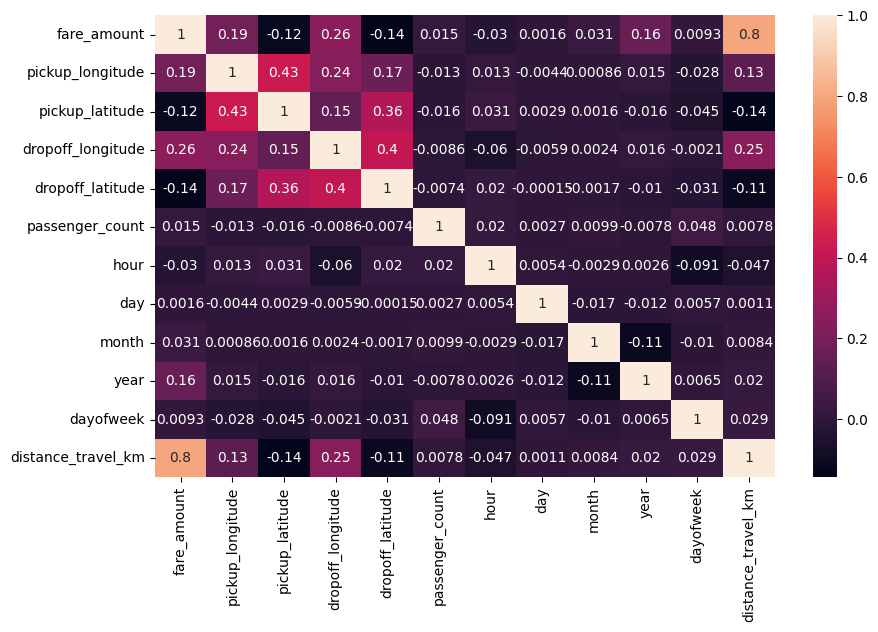

In [27]:
fig,axis=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [28]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','distance_travel_km']]
y = df['fare_amount']
#split data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
print("train size: ",x_train.shape," test size: ",x_test.shape)

train size:  (109236, 11)  test size:  (53803, 11)


In [29]:
#linear regression model
LR=LinearRegression()
LR.fit(x_train,y_train)

pred_LR= LR.predict(x_test)

In [30]:
print('Prediction:\n',pred_LR)
print('Actual Values: \n',y_test)

Prediction:
 [16.37447194  6.95655761  8.39951431 ...  8.93011449  9.10962053
  8.66222615]
Actual Values: 
 192432    16.10
123091     5.70
10203      6.50
52117     10.00
145487    10.10
          ...  
25744     22.25
85866     11.30
112194    10.00
100842    10.00
58384      8.10
Name: fare_amount, Length: 53803, dtype: float64


In [31]:
r2_LR = r2_score(y_test,pred_LR)
mse_LR = mean_squared_error(y_test,pred_LR)
rmse_LR = np.sqrt(mse_LR)
mae_LR = mean_absolute_error(y_test,pred_LR)

print("Linear Regression")
print(f"R2: {r2_LR:.4f}")
print(f"MSE: {mse_LR:.4f}")
print(f"RMSE: {rmse_LR:.4f}")
print(f"MAE: {mae_LR:.4f}")

Linear Regression
R2: 0.6792
MSE: 9.1661
RMSE: 3.0276
MAE: 2.1156


In [32]:
#random forest
rf=RandomForestRegressor(n_estimators=100)


In [33]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
pred_rf = rf.predict(x_test)
print("Prediction: \n",pred_rf)
print('Actual Values:\n',y_test)

Prediction: 
 [16.9965  6.02    9.1    ...  9.968   8.49    8.688 ]
Actual Values:
 192432    16.10
123091     5.70
10203      6.50
52117     10.00
145487    10.10
          ...  
25744     22.25
85866     11.30
112194    10.00
100842    10.00
58384      8.10
Name: fare_amount, Length: 53803, dtype: float64


In [35]:
r2_rf= r2_score(y_test,pred_rf)
mse_rf = mean_squared_error(y_test,pred_rf)
rmse_rf = np.sqrt(mse_LR)
mae_rf = mean_absolute_error(y_test,pred_rf)

print("Random Forest Regression")
print(f"R2: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

Random Forest Regression
R2: 0.8284
MSE: 4.9024
RMSE: 3.0276
MAE: 1.4646


In [36]:
print("\nModel Comparison:")
print(f"Linear Regression -> R2: {r2_LR:.4f}, RMSE: {rmse_LR:.4f},MAE {mae_LR:.4f}")
print(f"Random Forest -> R2: {r2_rf:.4f}, RMSE: {rmse_rf:.4f},MAE: {mae_rf:.4f}")

if r2_rf > r2_LR:
    print("\n Random Forest performed better.")
else:
    print("\n Linear Regression performed better.")



Model Comparison:
Linear Regression -> R2: 0.6792, RMSE: 3.0276,MAE 2.1156
Random Forest -> R2: 0.8284, RMSE: 3.0276,MAE: 1.4646

 Random Forest performed better.
